## Silk road analysis

This page summarise in the table below all the Silk Road forum users with a vendor profile. When the page exists and could be found the column "Vendor Profile" redirects to the Silk Road Vendor page of the user. The vendors pages are taken from the last StExo archives dated June 21st 2013. In some cases the vendor pages were not available in the StExo archive and will thus redirect to an error 404. A listing of the archived vendors pages is also available here.

---

In [17]:
import pandas as pd
import numpy as np
from thesaurus import Word
from dateutil import parser
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

### DPR Posts

In [12]:
dprposts = pd.read_csv('dprposts.csv', header=None)
dprposts.columns = ['link', 'post', 'date', 'time', 'username']

In [42]:
print('DPR Posts {}'.format(len(dprposts)))

DPR Posts 22630


In [41]:
dprposts.head(20)

,link,post,date,time,username
683,http://antilop.cc/sr/users/dpr/messages/201106...,we couldn't find an option for disabling the e...,2011-06-18,unspecified,Dread Pirate Roberts
684,http://antilop.cc/sr/users/dpr/messages/201106...,it's definitely a little screwy. We think it h...,2011-06-18,unspecified,Dread Pirate Roberts
686,http://antilop.cc/sr/users/dpr/messages/201106...,just make a new account and message us about i...,2011-06-19,unspecified,Dread Pirate Roberts
693,http://antilop.cc/sr/users/dpr/messages/201106...,is this still happening? we made some adjustme...,2011-06-19,unspecified,Dread Pirate Roberts
692,http://antilop.cc/sr/users/dpr/messages/201106...,"yea, it's built into smf, just put a fake addr...",2011-06-19,unspecified,Dread Pirate Roberts
691,http://antilop.cc/sr/users/dpr/messages/201106...,"Major announcements will, from now on, be sign...",2011-06-19,unspecified,Dread Pirate Roberts
685,http://antilop.cc/sr/users/dpr/messages/201106...,So sorry you are having trouble. Are there no ...,2011-06-19,unspecified,Dread Pirate Roberts
689,http://antilop.cc/sr/users/dpr/messages/201106...,Is this still an issue? I was able to create a...,2011-06-19,unspecified,Dread Pirate Roberts
687,http://antilop.cc/sr/users/dpr/messages/201106...,"great idea, it's on the to do list",2011-06-19,unspecified,Dread Pirate Roberts
690,http://antilop.cc/sr/users/dpr/messages/201106...,we use a 24hr moving average of the exchange r...,2011-06-19,unspecified,Dread Pirate Roberts


In [15]:
#cleaning dates part 1 
dprposts_integerdate = dprposts.sort_values('date')[:683]
listi = []
for i in dprposts_integerdate.index:
    stem = dprposts_integerdate['date'][i]
    listi.append(pd.to_datetime(stem[6:8]+stem[4:6]+stem[:4] , format='%d%m%Y'))

dprposts_integerdate['date'] = listi
#cleaning dates part 2
dprposts_strdate = dprposts.sort_values('date')[683:-1]
temp_vec = []
for i in dprposts_strdate.index:
    stem = dprposts_strdate['date'][i][:-1]
    temp_vec.append(pd.to_datetime(parser.parse(stem), format='%d%m%Y'))

dprposts_strdate['date'] = temp_vec
dprposts = dprposts_integerdate.append(dprposts_strdate)

### Post over time

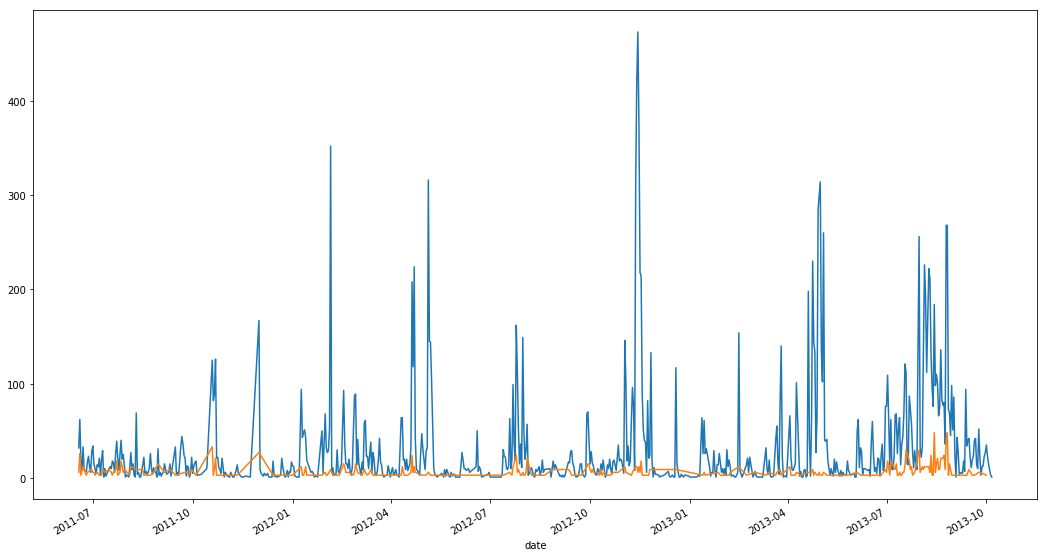

In [29]:
dpr = dprposts[dprposts['username'] == 'Dread Pirate Roberts']
plt.figure(figsize=(18,10))
dprposts.groupby('date').count()['post'].plot()
dpr.groupby('date').count()['post'].plot()
#plt.gca().set_ylim([0,100])

### Posts Filtering

In [6]:
def syn_of_syn(word):
    w = Word(word)
    key_filter = w.synonyms(0)
    for i in w.synonyms(0):
        key_filter.append(i)
        
    word_syn = []
    for i in key_filter:
        word_syn.append(Word(str(i)).synonyms('all'))
        
    word_syn = list(set([j for sub in [item for sublist in word_syn for item in sublist] for j in sub]))
    print(len(word_syn))
    return word_syn

In [7]:
def synonyms(word):
    w = Word(word)
    key_filter = w.synonyms(0)
    for i in w.synonyms(0):
        key_filter.append(i)
    print(len(key_filter))
    return key_filter

In [8]:
enforcement = synonyms('enforcement')

50


In [9]:
enforcement_syns = syn_of_syn('enforcement')

738


In [ ]:
enforcement_syns = syn_of_syn('enforcement')

In [65]:
#enforcement_syns

In [67]:
#enforcement

In [52]:
matches = []
for i in range(len(enforcement)):
    if any(word in enforcement[i] for word in dpr['post']):
        matches.append(i)

In [61]:
#dpr = dpr.loc[~dpr.index.isin([1366])]

In [31]:
def filter_posts(keywords_list, text_list):
    matches = []
    for i in range(len(text_list)):
        if any(word in text_list[i] for word in keywords_list):
            matches.append(i)
    print('Matches {}'.format(matches))
    return matches

In [ ]:
matches = filter_posts(['law'], dpr['post'])

In [158]:
#key_filter

In [159]:
dprposts_fltered = dprposts.ix[matches]

In [160]:
for i in dprposts_fltered['post']:
    print(i)


					Atlantis was good for Silk Road and the community at large and I am sad to see it go.  Yes they were a bit cocky and aggressive, but they never crossed the line and did anything unethical, and they served their customers well.  They reminded us in the Silk Road administration that to stay #1, we have to be constantly thinking of our users and how to serve them best and can not take for granted your loyalty.There has been more than one occasion where I have wanted to quit as well.  Without going into details, the stress of being DPR is sometimes overwhelming.  What keeps me going is the understanding that what we are doing here is more important than my insignificant little life.  I believe what we are doing will have rippling effects for generations to come and could be part of a monumental shift in how human beings organize and relate to one another.  I have gone through the mental exercise of spending a lifetime in prison and of dying for this cause.  I have let the fear pass t

### Matching with law

In [59]:
matches = filter_posts(['law'], dprposts['post'])

In [60]:
len(matches)

716

In [61]:
dprposts_fltered = dprposts.ix[matches]

In [172]:
for i in dpr_filter['post']:
    print(i)


					Atlantis was good for Silk Road and the community at large and I am sad to see it go.  Yes they were a bit cocky and aggressive, but they never crossed the line and did anything unethical, and they served their customers well.  They reminded us in the Silk Road administration that to stay #1, we have to be constantly thinking of our users and how to serve them best and can not take for granted your loyalty.There has been more than one occasion where I have wanted to quit as well.  Without going into details, the stress of being DPR is sometimes overwhelming.  What keeps me going is the understanding that what we are doing here is more important than my insignificant little life.  I believe what we are doing will have rippling effects for generations to come and could be part of a monumental shift in how human beings organize and relate to one another.  I have gone through the mental exercise of spending a lifetime in prison and of dying for this cause.  I have let the fear pass t

#### Users

In [151]:
for i in dprposts_dateclean.sort_values('username')['username'].unique():
    print(i)

-Bish0p-
-MPHtitude-
/I_Surf_Worm_Holes
0000ff42
0ni0ns
0x41430
12345
123ABC
1455992
16384
18kct
19431975
19467382
1c3
1mIcedout
1millionways
1n50mn14c
2002tii
20247245
20DollarBILL
2513415
2513415805
2L5D
2Leftfeet
2marijuanaman
2stoned
2xT4eB
32zitsyfly
34trimethoxy
34tuforlunch
3Jane
3dkf3sdf
3dvision
3eyes
3kingdommaster
4.20
40opana
41910192618123
420MEDS
420blindman
420jordan
420kommi
45mypet
46&2
46andtwo
4903kmn1d
4am
4onion
4sale
4tron
5
5446
5tbzd65r
69isfun
7136214bradd
72289
751a696c24d97009
76ersbasketball
77Tjm
7Kz2
800hobo90
88
88fxstc
911911
913163
98080678
9KeeH
A.O.D.Official
A1pha
AAAARRRRRRGGGGG
AAfive
AAkoven
AJAPAI
AL T. IDman
ASPergErsw
AVGConsumer
Abagnale69
AbraCadaver
AbraxasRiseth
Abritishperson
AbuNazir
Ace
Achillesdagreek
AcrylicArt
Adasel
Addy
AdmiralSpanky
Admit
Afflicted_Aggressor
AfricanBushDoctor
AfterHour
AfternoonDelight
AgentLee
Aghe123
Agorism2Voluntaryism
Ahoyhoy
Aidoneus
AimHigh
Air Jordan
AirshipAdmiral
Al4np47n3
Albert Hoffman
AlbertHoffman1943

### TF-IDF DPR

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(dprposts['post'])
idf = tfidf.idf_

In [18]:
weights = np.asarray(train_vect.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tfidf.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)
#dict(zip(tfidf.get_feature_names(), idf))

,term,weight
470,just,0.034842
277,dpr,0.033899
839,sr,0.033135
507,like,0.028136
708,quote,0.025515
877,thanks,0.022955
639,people,0.022446
26,2013,0.021747
888,time,0.021190
816,site,0.020783


In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [20]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in weights_df['term']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens:
        comment_words = comment_words + words + ' '

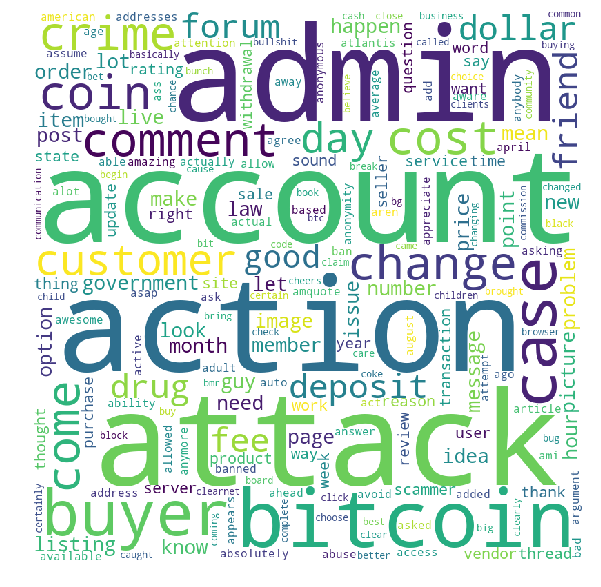

In [21]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

---

#### Vendors dataset

In [46]:
vendors = pd.read_csv('silk-road-vendors.csv')

In [47]:
vendors.head()

,Username,Forum Profile,Vendor Profile,Date Registered,Last Active,Signature,Personal Text,Custom Title,Location,Posts,Karma
0,Herbal Remedy,53689,39a9ee57e6,2013/02/05 07:30,2013/09/01 02:38,Vendor page and PGP public key: \nhttp://silk...,NaN,NaN,NaN,63 (0.257 per day),+1/-0
1,nomad bloodbath,89,f6b29a3812,2011/06/18 13:54,2013/10/07 02:42,R.I.P. Moderator 2011-2013\n18dtoSZVvSNC3Z8iqR...,Local Silverback,Silk Road Revolutionary,18dtoSZVvSNC3Z8iqRLCZLK83jAS6otycP,4179 (4.957 per day),+528/-94
2,elk,15825,NaN,2012/03/28 21:52,NaN,check out my listings here: \nsilkroadvb5piz3r...,NaN,NaN,NaN,11 (0.020 per day),+0/-0
3,TimHortons,78920,c3e3aafc10,2013/07/13 00:35,2013/10/01 02:39,Vendor Page: http://silkroadvb5piz3r.onion/sil...,NaN,NaN,NaN,73 (0.839 per day),+3/-0
4,safesecureair,34928,31866db3c2,2012/09/18 06:38,2013/09/20 12:07,http://silkroadvb5piz3r.onion/index.php/silkro...,NaN,NaN,NaN,5 (0.013 per day),+0/-1


In [48]:
vendors_pt = vendors[vendors['Personal Text'].notnull()]

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(vendors_pt['Personal Text'])
idf = tfidf.idf_

In [50]:
weights = np.asarray(train_vect.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tfidf.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)
#dict(zip(tfidf.get_feature_names(), idf))

,term,weight
486,vendor,0.076068
428,sr,0.051977
498,weed,0.017602
252,love,0.014162
362,quality,0.013143
202,high,0.012473
479,uk,0.011545
410,silk,0.010935
223,just,0.010650
257,lsd,0.009930


In [36]:
#!pip install wordcloud

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [58]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in weights_df['term']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens:
        comment_words = comment_words + words + ' '

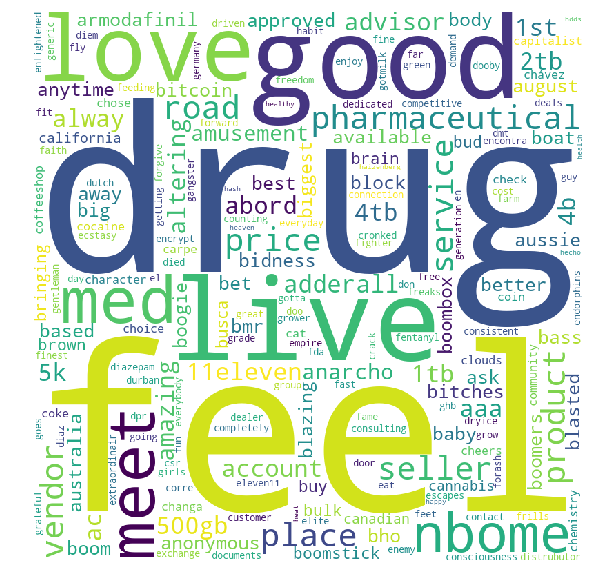

In [61]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

---

#### Trial dataset

In [78]:
with open('silkroadtrial.txt') as f:
    silkroadtrial = f.read().splitlines()

In [82]:
silkroadtrial[0]

'UNITED STATES OF AMERICA v. ROSS WILLIAM ULBRICHT Trial Transcript'

In [83]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in silkroadtrial: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens:
        comment_words = comment_words + words + ' '

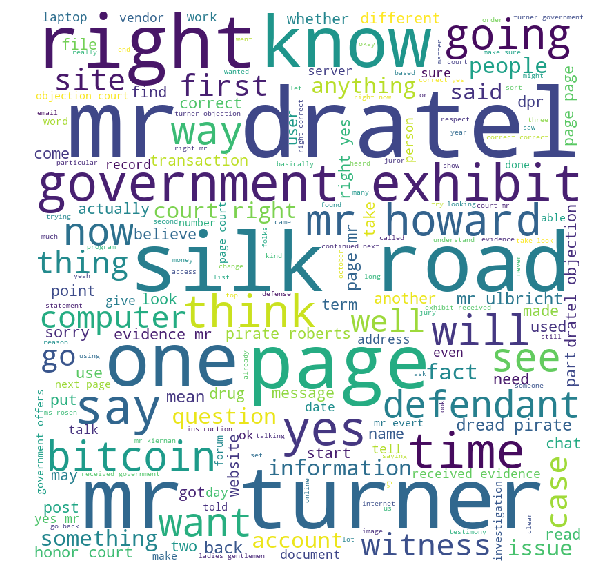

In [86]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 